In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd


# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor # for building the model
from sklearn.preprocessing import MinMaxScaler

# Reading the data
# Reading the data
dataset = pd.read_csv("Dataset/Desharnais.csv")
dataset.head()


max_corr_features =  [ 'TeamExp', 'ManagerExp', 'YearEnd', 'Length', 'Transactions', 'Entities',
        'PointsNonAdjust', 'Adjustment', 'PointsAjust']


x=np.array(dataset[max_corr_features])

y=np.array(dataset['Effort'])



In [2]:
scaler=MinMaxScaler(feature_range=(0,1))
x_scaled=scaler.fit_transform(x)
y=np.reshape(y,(81,1))
y=scaler.fit_transform(y)

In [3]:


# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 34)

# Initializing the Random Forest Regression model with 10 decision trees
model1 = RandomForestRegressor(n_estimators = 10, random_state = 0)



# Fitting the Random Forest Regression model to the data
model1.fit(x_train, y_train.ravel()) 


# Predicting the target values of the test set
y_pred = model1.predict(x_test)

x_train

array([[1.        , 0.625     , 0.66666667, 0.34210526, 0.0672748 ,
        0.81315789, 0.29506641, 0.31914894, 0.25047438],
       [0.6       , 0.5       , 0.5       , 0.42105263, 0.24173318,
        0.3       , 0.25521822, 0.63829787, 0.26565465],
       [1.        , 0.5       , 0.5       , 0.18421053, 0.05473204,
        0.09473684, 0.0256167 , 0.80851064, 0.04364326],
       [0.8       , 0.5       , 1.        , 0.39473684, 0.3340935 ,
        0.36315789, 0.35483871, 1.        , 0.4373814 ],
       [0.6       , 0.625     , 0.66666667, 0.10526316, 0.3386545 ,
        0.32894737, 0.34629981, 0.68085106, 0.36527514],
       [0.2       , 0.125     , 0.66666667, 0.07894737, 0.14937286,
        0.22894737, 0.15275142, 0.40425532, 0.13851992],
       [0.4       , 0.625     , 0.83333333, 0.18421053, 0.13112885,
        0.11842105, 0.09772296, 0.19148936, 0.07305503],
       [1.        , 0.625     , 0.5       , 0.39473684, 0.12200684,
        0.42894737, 0.20208729, 0.46808511, 0.19070209],


In [4]:
model1.fit(x_train, y_train)
print(model1.score(x_train,y_train))

0.8959741576846185


C:\Users\sachi\AppData\Local\Temp\ipykernel_1244\2692853606.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(x_train, y_train)


In [5]:
#accuracy on testdata on Model
model1.fit(x_test, y_test)
print(model1.score(x_test,y_test))

0.7743405279339955


C:\Users\sachi\AppData\Local\Temp\ipykernel_1244\1329468195.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(x_test, y_test)


In [6]:
y_pred=np.reshape(y_pred,(17,1))
y_test=np.reshape(y_test,(17,1))

In [7]:
y_test

array([[0.04398564],
       [0.22531418],
       [0.14392579],
       [0.15948534],
       [0.14512268],
       [0.05685218],
       [0.13165769],
       [0.07420706],
       [0.26301616],
       [0.14452424],
       [0.19688809],
       [0.04578097],
       [0.14033513],
       [0.07630162],
       [0.38360263],
       [0.09634949],
       [0.21753441]])

In [8]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [9]:

def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-model1.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.0070815910756194134

RMSE:
 0.0841521899633005

MAPE:
 46.166755973452055

SMAPE:
 38.14

 Adj R2 score:
 0.09758782121567167


In [10]:
y_pred=scaler.inverse_transform(y_pred)

In [11]:
y_test=scaler.inverse_transform(y_test)

In [12]:
y_test=np.reshape(y_test,(17,))
y_pred=np.reshape(y_pred,(17,))

In [13]:
dfr=pd.DataFrame({'Actual effort':y_test, 'Predicted effort':y_pred})
print(dfr)

    Actual effort  Predicted effort
0          1575.0            1464.1
1          5817.0            3032.7
2          3913.0            4498.5
3          4277.0            8348.9
4          3941.0            6090.7
5          1876.0            2041.9
6          3626.0            5663.7
7          2282.0            1445.5
8          6699.0           10252.9
9          3927.0            2997.4
10         5152.0            5574.1
11         1617.0            2623.6
12         3829.0            5242.3
13         2331.0            2655.8
14         9520.0           12203.8
15         2800.0            5574.1
16         5635.0            5733.7


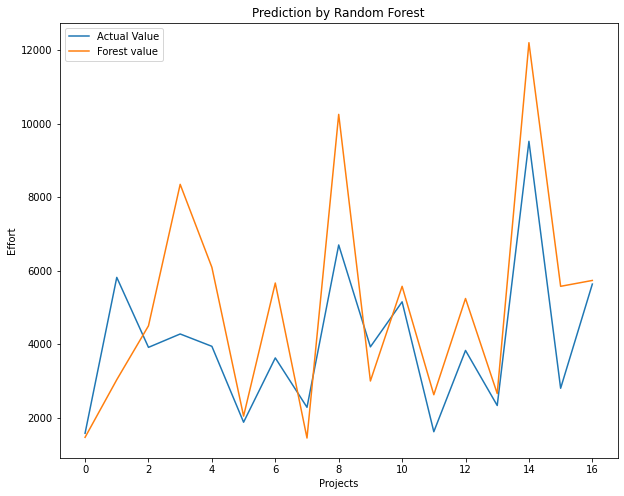

In [14]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Forest value")
plt.title("Prediction by Random Forest")
plt.xlabel("Projects")
plt.ylabel("Effort")
plt.legend()
plt.show()